# 0. Import Packages

In [44]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
from matplotlib.colors import LinearSegmentedColormap
from sklearn.neighbors import NearestNeighbors
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# 1. Data Preprocessing

In [46]:
# Read data
df = pd.read_csv('BehaviourData.csv', sep = ',', dtype = None)

# Remove qweek and contact in house
df.drop(['qweek',
         'i1_health'
        ], axis = 1, inplace = True)

In [47]:
# Rename
df.rename({'i2_health' : "NumContact",
           'i7a_health': 'LeaveHouse', 
           'i3_health': 'CovidResult',
           'i4_health': 'HouseCovid',
           'i5_health_1': 'Cough',
           'i5_health_2': 'Fever',
           'i5_health_3': 'Smell',
           'i5_health_4': 'Taste',
           'i5_health_5': 'Breathing',
           'i5_health_99': 'NoSymptoms',
           'i5a_health': 'CovidContact',
           'i6_health': 'SelfIsolationLevel',
           'i7b_health': 'HealthCareVisit',
           'i8_health': 'PriorTravel',
           'i9_health': 'WouldIsolate',
           'i10_health': 'IsolationDifficulty',
           'i11_health': 'IsolationWillingness',
           'i12_health_1': 'Mask',
           'i12_health_2': 'Soap',
           'i12_health_3': 'HandSanitiser',
           'i12_health_4': 'CoverSneeze',
           'i12_health_5': 'AvoidContact',
           'i12_health_6': 'AvoidGoingOut',
           'i12_health_7': 'AvoidHealthcare',
           'i12_health_8': 'AvoidTransit',
           'i12_health_9': 'AvoidWorkingOutside',
           'i12_health_10': 'AvoidAcademics',
           'i12_health_11': 'AvoidGuests',
           'i12_health_12': 'AvoidSmallGatherings',
           'i12_health_13': 'AvoidMedGatherings',
           'i12_health_14': 'AvoidLargeGatherings',
           'i12_health_15': 'AvoidCrowds',
           'i12_health_16': 'AvoidShops',
           'i12_health_17': 'AvoidSharedBedroom',
           'i12_health_18': 'EatSeperately',
           'i12_health_19': 'CleanSurfaces',
           'i12_health_20': 'AvoidPublicObjects',
           'i13_health': 'NumHandWash',
           'i14_health_1': 'Construction',
           'i14_health_2': 'HomeDelivery',
           'i14_health_3': 'FoodRetail',
           'i14_health_4': 'Healthcare',
           'i14_health_5': 'Logistics',
           'i14_health_6': 'Manufacturing',
           'i14_health_7': 'Police',
           'i14_health_8': 'PublicTransport',
           'i14_health_9': 'School',
           'i14_health_10': 'SocialCare',
           'i14_health_96': 'Other',
           'i14_health_98': 'NotSure',
           'i14_health_99': 'WorkFromHome',
           'i14_health_other': 'HealthOther',
           'd1_health_1': 'Arthritis',
           'd1_health_2': 'Asthma',
           'd1_health_3': 'Cancer',
           'd1_health_4': 'CysticFibrosis',
           'd1_health_5': 'COPD',
           'd1_health_6': 'Diabetes',
           'd1_health_7': 'Epilepsy',
           'd1_health_8': 'HeartDisease',
           'd1_health_9': 'HighBloodPressure',
           'd1_health_10': 'HighCholesterol',
           'd1_health_11': 'HIV',
           'd1_health_12': 'MentalHealth',
           'd1_health_13': 'MS',
           'd1_health_98': 'NotSay',
           'd1_health_99': 'NoneHealth',
           'weight': 'Weight',
           'age': 'Age',
           'region_state': 'Region',
           'gender': 'Gender',
           'household_size': 'HouseholdSize',
           'household_children': 'HouseholdChildren',
           'employment_status': 'EmploymentStatus'
           }, axis=1, inplace=True)


In [48]:
# Bucket age
def makeBins_manual(column, label, bins):
    df[f'{column}Bin'] = pd.cut(df[column], bins=bins, labels=labels, include_lowest=True)

# Bucket age into 3 groups 
labels = ['adolecent', 'adult', 'elderly']
ageBins = [0,20,65,100]
makeBins_manual('Age', labels, ageBins)

In [49]:
df[df["NoSymptoms"] == "No"].sample(20)

,Index,RecordNo,endtime,NumContact,LeaveHouse,CovidResult,HouseCovid,Cough,Fever,Smell,Taste,Breathing,NoSymptoms,CovidContact,SelfIsolationLevel,HealthCareVisit,PriorTravel,WouldIsolate,IsolationDifficulty,IsolationWillingness,Mask,Soap,HandSanitiser,CoverSneeze,AvoidContact,AvoidGoingOut,AvoidHealthcare,AvoidTransit,AvoidWorkingOutside,AvoidAcademics,AvoidGuests,AvoidSmallGatherings,AvoidMedGatherings,AvoidLargeGatherings,AvoidCrowds,AvoidShops,AvoidSharedBedroom,EatSeperately,CleanSurfaces,AvoidPublicObjects,NumHandWash,Construction,HomeDelivery,FoodRetail,Healthcare,Logistics,Manufacturing,Police,PublicTransport,School,SocialCare,Other,NotSure,WorkFromHome,HealthOther,Arthritis,Asthma,Cancer,CysticFibrosis,COPD,Diabetes,Epilepsy,HeartDisease,HighBloodPressure,HighCholesterol,HIV,MentalHealth,MS,NotSay,NoneHealth,Weight,Gender,Age,Region,HouseholdSize,HouseholdChildren,EmploymentStatus,AgeBin
10965,10965,CAN10965,19/09/2020 13:40,0,0,"No, I have not","No, they have not",Yes,No,No,No,No,No,No,Always,,,,,,Always,Always,Always,Always,Always,Always,Always,Always,Always,Rarely,Always,Always,Always,Always,Always,Always,Always,Always,Always,Always,50,No,No,No,No,No,No,No,No,No,No,No,No,Yes,__NA__,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,1.162585,Female,38,Ontario,3,1,Full time employment,adult
24025,24025,USA12182,23/07/2020 12:03,15,3,"No, I have not","No, they have not",No,No,No,No,Yes,No,Not sure,Rarely,No,No,Yes,Very easy,Very willing,Frequently,Sometimes,Frequently,Frequently,Always,Rarely,Always,Always,Frequently,,Always,Frequently,Frequently,Always,Always,Frequently,Not at all,Always,Rarely,Not at all,2,No,No,No,No,No,No,No,No,No,No,No,No,Yes,__NA__,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,1.189455,Male,49,Minnesota,3,0,Full time employment,adult
8640,8640,CAN8640,09/08/2020 18:07,5,1,"No, I have not","No, they have not",Yes,No,No,No,No,No,No,Not at all,No,No,Not sure,Somewhat easy,Very willing,Always,Always,Always,Always,Always,Rarely,Always,Always,Always,Not at all,Sometimes,Sometimes,Sometimes,Always,Always,Frequently,Not at all,Always,Rarely,Always,7,No,No,No,No,No,No,No,No,No,No,No,No,Yes,__NA__,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,1.005820,Female,40,Ontario,3,1,Full time employment,adult
23484,23484,USA11641,11/07/2020 04:30,23,1,"No, I have not",Not sure,Yes,No,No,No,No,No,Not sure,Not at all,No,No,Yes,Somewhat easy,Very willing,Always,Always,Not at all,Always,Always,Always,Always,Not at all,Not at all,,Sometimes,Frequently,Always,Always,Frequently,Sometimes,Not at all,Not at all,Frequently,Always,27,No,No,Yes,No,No,No,No,No,No,No,No,No,No,__NA__,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,1.139592,Male,22,Mississippi,2,0,Part time employment,adult
25315,25315,USA13472,07/08/2020 15:15,5,0,"No, I have not","No, they have not",Yes,Yes,No,No,No,No,Not sure,Frequently,No,Yes,Yes,Somewhat easy,Very willing,Always,Frequently,Always,Always,Always,Frequently,Always,Not at all,,,Always,Always,Always,Always,Frequently,Frequently,Not at all,Not at all,Always,Frequently,7,,,,,,,,,,,,,,__NA__,Yes,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,0.934178,Female,65,Georgia,1,0,Retired,adult
4864,4864,CAN4864,15/06/2020 00:07,10,1,"No, I have not","No, they have not",Yes,Yes,Yes,Yes,Yes,No,No,Always,No,No,No,Neither easy nor difficult,Neither willing nor unwilling,Always,Always,Always,Always,Always,Always,Always,Always,Not at all,,Always,Sometimes,Always,Always,Always,Always,Rarely,Frequently,Always,Always,50,No,No,No,Yes,No,No,No,No,No,No,No,No,No,__NA__,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0.946726,Female,27,Alberta,2,0,Full time employment,adult
16027,16027,USA4184,21/04/2020 20:17,0,0,"No, I have not","Yes, and they tested negative",Yes,No,No,No,No,No,No,Always,No,No,Yes,Very easy,Very willing,Not at all,Frequently,Always,Always,Always,Always,Not at all,Always,Sometimes,Always,Always,Always,Always,Always,Always,Always,Not at all,Rarely,Always,Always,8,No,No,No,No,No,No,No,No,No,No,No,No,Yes,__NA__,No,N

In [50]:
# Create binary symptom columns
df['HasSymptoms'] = (((df.Cough == 'Yes') | (df.Fever == 'Yes') | (df.Smell == 'Yes') | (df.Taste == 'Yes') | (df.Breathing == 'Yes')) & (df.NoSymptoms == 'No') )

# Predictor bucketed, I think this can maybe stay as it was
df['MaskBucket'] = df['Mask'].map({'Always' : 'Yes', 'Frequently' : 'Yes', 'Sometimes' : 'No',  'Rarely' : 'No', 'Not at all' : 'No'})


# 2. Investigate Missing Values

In [51]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df.loc[2555,"Construction"])

' '

In [52]:
df_test = df.copy(deep=True)
df_test.replace(r'^\s+$', np.nan, regex=True, inplace=True)
df_test.replace('__NA__', np.nan, inplace=True)
df_test.replace("Don't know", np.nan, inplace=True)
missing_value_count = df_test.isna().sum()
missing_value_count_df = missing_value_count.to_frame().reset_index()
missing_value_count_df.columns = ["Predictors", "Count"]

In [53]:
missing_value_percentage_df = missing_value_count_df
missing_value_percentage_df["Count"] = missing_value_count_df["Count"].div(df_test.shape[0])

<AxesSubplot:xlabel='Predictors', ylabel='Count'>

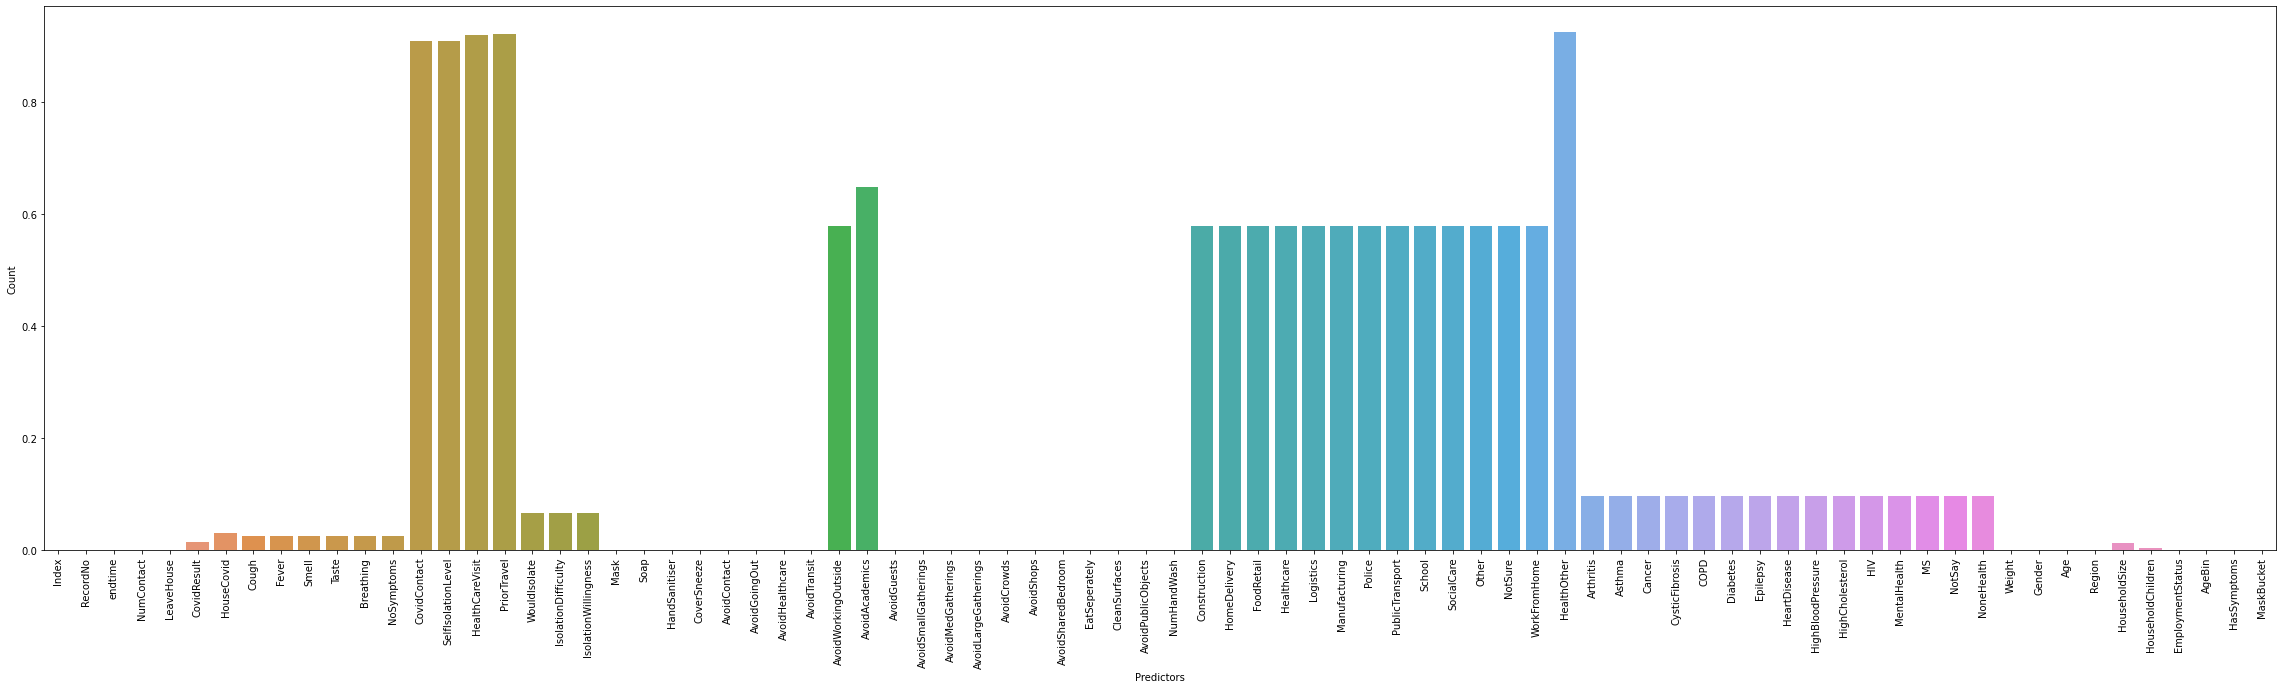

In [54]:
plt.figure(figsize=(40,10))
plt.xticks(rotation=90)
sns.barplot(data=missing_value_count_df, x = "Predictors", y = "Count")

<AxesSubplot:xlabel='Predictors', ylabel='Count'>

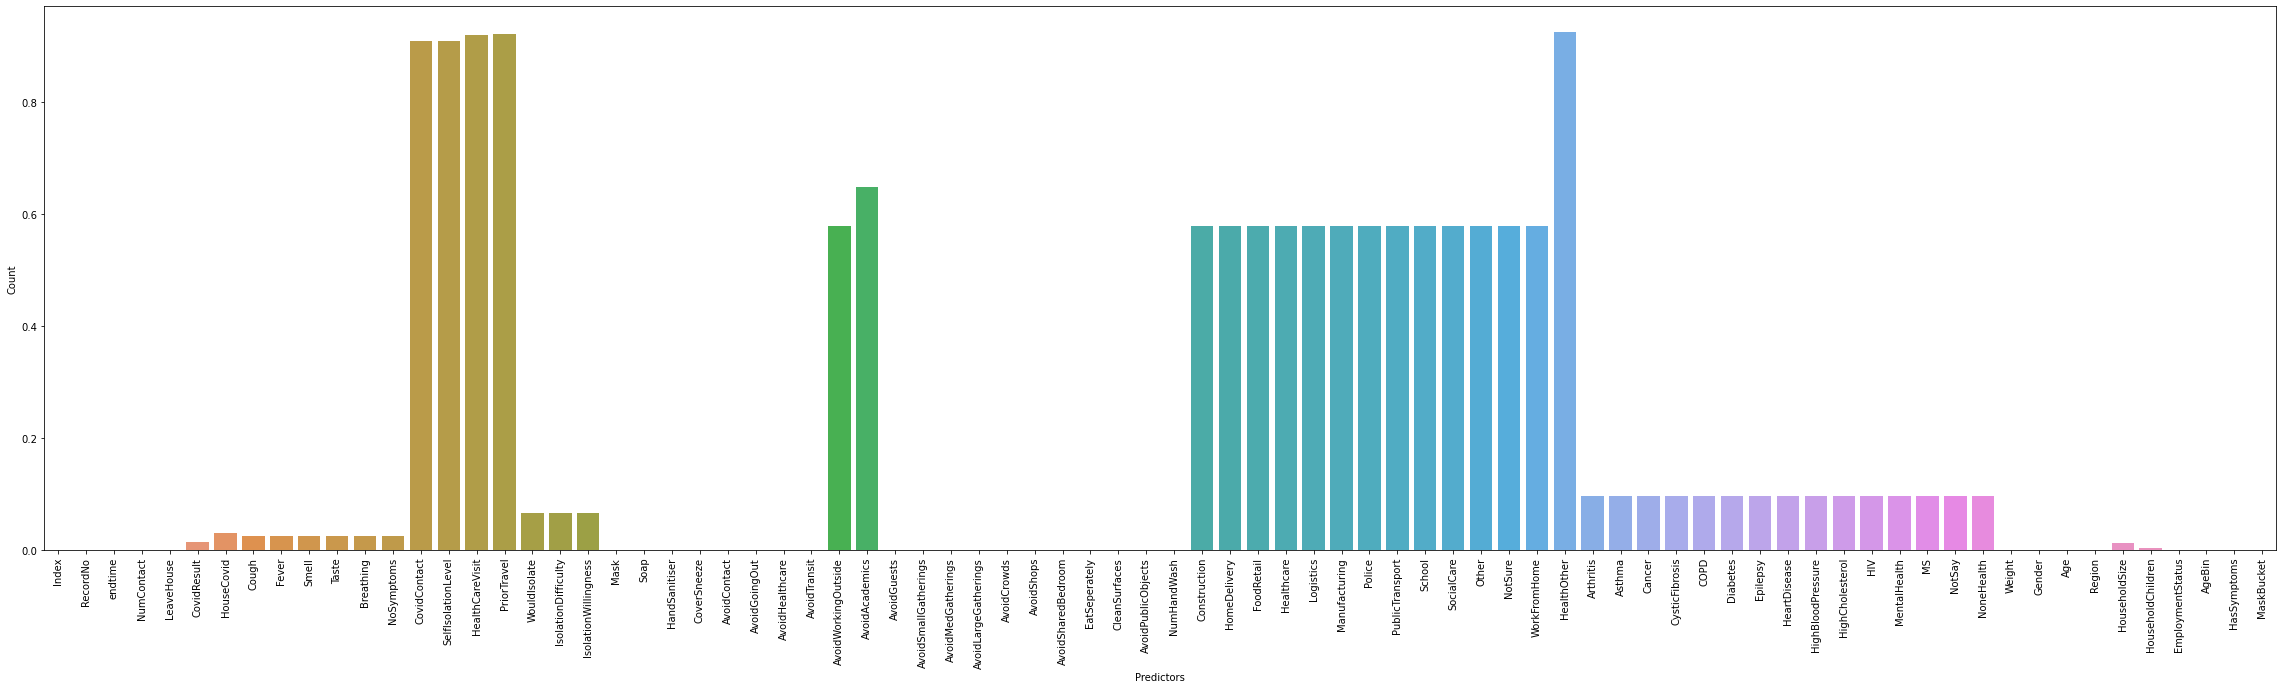

In [55]:
plt.figure(figsize=(40,10))
plt.xticks(rotation=90)
sns.barplot(data=missing_value_percentage_df, x = "Predictors", y = "Count")

## 2.1 Dealing with Missing Values and Transforming Data

In [56]:
cleaned_df = df.copy(deep = True)

In [57]:
# Replace household children with binary
cleaned_df['HasChildren'] = (cleaned_df['HouseholdChildren'] != '0')

# Drop used columns
cleaned_df = cleaned_df.drop(['HouseholdChildren', 'HealthOther'], axis=1)
cleaned_df = cleaned_df.drop(['Index', 'RecordNo', 'endtime', 'Region'],axis = 1)
cleaned_df = cleaned_df.drop(['Cough', 'Fever', 'Smell', 'Taste', 'Breathing', 'NoSymptoms'],axis = 1)

In [58]:
# Replace nominal values with numeric values in Avoid columns
# Exclud 'AvoidWorkingOutside', 'AvoidAcademics' due to missing values
# Give AvoidScore by summing the rows
cleaned_df["AvoidScore"] = cleaned_df[['AvoidContact', 'AvoidGoingOut', 'AvoidHealthcare', 'AvoidTransit', 
           'AvoidGuests', 'AvoidSmallGatherings', 'AvoidMedGatherings', 'AvoidLargeGatherings','AvoidCrowds', 
           'AvoidShops', 'AvoidSharedBedroom', 
           'AvoidPublicObjects']].replace({"Always": 5, 
                                         "Frequently": 4, 
                                         "Sometimes": 3,
                                         "Rarely":2,
                                         "Not at all": 1}).sum(axis=1)

In [59]:
# Drop used columns
cleaned_df.drop(['AvoidContact', 'AvoidGoingOut', 'AvoidHealthcare', 'AvoidTransit', 
           'AvoidGuests', 'AvoidSmallGatherings', 'AvoidMedGatherings', 'AvoidLargeGatherings','AvoidCrowds', 
           'AvoidShops', 'AvoidSharedBedroom', 
           'AvoidPublicObjects'], axis = 1, inplace = True)

In [60]:
# Drop 'AvoidWorkingOutside', 'AvoidAcademics' due to missing values
cleaned_df.drop(['AvoidWorkingOutside', 'AvoidAcademics'], axis = 1, inplace = True)

In [61]:
# Too many missing values, drop columns
cleaned_df.drop(['CovidContact', 'SelfIsolationLevel', 'HealthCareVisit', 'PriorTravel', 
                              'Construction', 'HomeDelivery', 'FoodRetail','Healthcare', 'Logistics', 
                              'Manufacturing', 'Police', 'PublicTransport', 'School', 'SocialCare', 'Other', 
                              'NotSure', 'WorkFromHome'], axis = 1, inplace = True)

In [62]:
# Replace " ", '__NA__', "Don't know" with np.nan
cleaned_df.replace(r'^\s+$', np.nan, regex=True, inplace=True)
cleaned_df.replace('__NA__', np.nan, inplace=True)
cleaned_df.replace("Don't know", np.nan, inplace=True)

In [63]:
# Drop rows that contains nan for 'IsolationDifficulty', 'WouldIsolate', 'IsolationWillingness','CovidResult','HouseCovid'
cleaned_df = cleaned_df.dropna(subset=['IsolationDifficulty', 'WouldIsolate', 'IsolationWillingness','CovidResult','HouseCovid'])

In [64]:
# Investigation on diseases

# Cancer can damage inmmunsystem
# Cystic Fibrosis can cause mucus build-up and decreased mucociliary clearance, indicating a serious prognosis when contracting COVID
# Chronic inflammatory lung disease (COPD) causes obstructed airflow from the lungs
# Data suggests that immunocompromised patients, specifically patients with inflammatory arthritis, HIV, 
    # or who have had an organ transplant, are at a “substantial risk” for infection, regardless of vaccination status.
# People with epilepsy are not at higher risk of getting COVID-19, getting a severe case, or dying of COVID-19.
    # People with epilepsy can have seizures triggered by fever
# People with Heart Disease, High Blood Pressure, HighCholesterol, HIV have weakened immunesystem
# People with SMI are not only more likely to get COVID-19 compared to the general population, 
    # they are also more likely to suffer from severe COVID-19, require hospitalization, and die.
# COVID can trigger asthma symptoms
# Current evidence shows that simply having MS does not make you more likely than the general population to develop COVID-19, 
    # become severely ill or die from the infection. 
    # However, certain factors have been shown to increase the risk of a severe case of COVID-19

# If there is any disease, set true
cleaned_df['UnderlyingHealth'] =  (cleaned_df.Arthritis == 'Yes') | \
    (cleaned_df.Asthma == 'Yes') |(cleaned_df.Cancer == 'Yes') | \
    (cleaned_df.CysticFibrosis == 'Yes') |(cleaned_df.COPD == 'Yes') |(cleaned_df.Diabetes == 'Yes') |\
    (cleaned_df.Epilepsy == 'Yes')  |(cleaned_df.HeartDisease == 'Yes') |(cleaned_df.HighBloodPressure == 'Yes')|\
    (cleaned_df.HighCholesterol == 'Yes')|(cleaned_df.HIV == 'Yes') |(cleaned_df.MS == 'Yes')|\
    (cleaned_df.MentalHealth == 'Yes')



In [65]:
# Assign each disease with a severity score. The score indicates the infection risk and prognosis after contract COVID
cleaned_df.Arthritis = cleaned_df.Arthritis.apply(lambda x: 1 if x == "Yes" else 0)
cleaned_df.Cancer = cleaned_df.Cancer.apply(lambda x: 3 if x == "Yes" else 0)
cleaned_df.Asthma = cleaned_df.Asthma.apply(lambda x: 5 if x == "Yes" else 0)
cleaned_df.CysticFibrosis = cleaned_df.CysticFibrosis.apply(lambda x: 4 if x == "Yes" else 0)
cleaned_df.COPD = cleaned_df.COPD.apply(lambda x: 5 if x == "Yes" else 0)
cleaned_df.Diabetes = cleaned_df.Diabetes.apply(lambda x: 2 if x == "Yes" else 0)
cleaned_df.Epilepsy = cleaned_df.Epilepsy.apply(lambda x: 1 if x == "Yes" else 0)
cleaned_df.HeartDisease = cleaned_df.HeartDisease.apply(lambda x: 2 if x == "Yes" else 0)
cleaned_df.HighBloodPressure = cleaned_df.HighBloodPressure.apply(lambda x: 1 if x == "Yes" else 0)
cleaned_df.HighCholesterol = cleaned_df.HighCholesterol.apply(lambda x: 1 if x == "Yes" else 0)
cleaned_df.HIV = cleaned_df.HIV.apply(lambda x: 4 if x == "Yes" else 0)
cleaned_df.MS = cleaned_df.MS.apply(lambda x: 2 if x == "Yes" else 0)

In [66]:
cleaned_df['IllnessScore'] = cleaned_df[['Asthma', 'Arthritis', 'MentalHealth','Cancer', 'HighBloodPressure', 
                              'HighCholesterol', 'CysticFibrosis', 'COPD', 'Diabetes', 'HeartDisease', 
                              'HIV', 'MS', 'Epilepsy', 'NotSay', "NoneHealth"]].sum(axis=1)

C:\Users\ddjgy\AppData\Local\Temp\ipykernel_38084\3913133625.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cleaned_df['IllnessScore'] = cleaned_df[['Asthma', 'Arthritis', 'MentalHealth','Cancer', 'HighBloodPressure',


In [67]:
# If NoneHealth, set False
cleaned_df['UnderlyingHealth'] = ~(cleaned_df.NoneHealth == 'Yes')
# cleaned_df['UnderlyingHealth'] = cleaned_df['UnderlyingHealth'].apply(lambda x: str(x))

# Drop rows when NotSay is Yes
cleaned_df = cleaned_df.drop(cleaned_df[cleaned_df["NotSay"] == "Yes"].index)

# If Not Say is yes, set UnderlyingHealth to NotSay
# cleaned_df.loc[cleaned_df["NotSay"] == "Yes", "UnderlyingHealth"] = "NotSay"

In [68]:
# Drop disease columns
cleaned_df = cleaned_df.drop(['Asthma', 'Arthritis', 'MentalHealth','Cancer', 'HighBloodPressure', 
                              'HighCholesterol', 'CysticFibrosis', 'COPD', 'Diabetes', 'HeartDisease', 
                              'HIV', 'MS', 'Epilepsy', 'NotSay', "NoneHealth"], axis=1)

# Drop rows that have missing values in UnderlyingHealth
cleaned_df = cleaned_df.dropna(subset=["UnderlyingHealth"])

In [69]:
# Replace '8 or more' with '8' and 'Prefer not to say' with '0' in HouseholdSize
cleaned_df['HouseholdSize'] = cleaned_df['HouseholdSize'].replace('8 or more', '8')
cleaned_df['HouseholdSize'] = cleaned_df['HouseholdSize'].replace('Prefer not to say', '0')

# Drop nan rows in HouseholdSize
cleaned_df = cleaned_df.dropna(subset=["HouseholdSize"])

In [70]:
# Replace nominal values with numeric values in Precaution columns
# Give PrecautionScore by summing the rows
cleaned_df["PrecautionScore"] = cleaned_df[['Soap', 'HandSanitiser', 'CoverSneeze', 'EatSeperately', 
           'CleanSurfaces']].replace({"Always": 5, 
                                         "Frequently": 4, 
                                         "Sometimes": 3,
                                         "Rarely":2,
                                         "Not at all": 1}).sum(axis=1)
# Drop precaution columns
cleaned_df = cleaned_df.drop(['Soap', 'HandSanitiser', 'CoverSneeze', 'EatSeperately', 'CleanSurfaces'], axis=1)

In [71]:
# Replace nominal values with numeric values in IsolationWillingness column
# Give PrecautionScore by summing the rows
cleaned_df["IsolationWillingness"] = cleaned_df[['IsolationWillingness']].replace({"Very willing": 5, 
                                         "Somewhat willing": 4, 
                                         "Neither willing nor unwilling": 3,
                                         "Somewhat unwilling":2,
                                         "Very unwilling": 1,
                                         "Not sure": 0}).sum(axis=1)


In [72]:
# Replace nominal values with boolean values in EmploymentStatus column
cleaned_df["EmploymentBoolean"] = cleaned_df[['EmploymentStatus']].replace({"Full time employment": True, 
                                         "Part time employment": True, 
                                         "Full time student": True,
                                         "Retired":False,
                                         "Unemployed": False,
                                         "Not working": False,
                                         "Other":False})

In [73]:
# Change Gender to Boolean type
cleaned_df["Gender"] = cleaned_df[['Gender']].replace({"Male": True, 
                                         "Female": False})

In [74]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(cleaned_df['MaskBucket'].value_counts())

Yes    16297
No      8911
Name: MaskBucket, dtype: int64

In [75]:
# Select columns to use as input data to the model
selected_df = cleaned_df[['HasSymptoms', 'UnderlyingHealth', 'HasChildren', 'Gender', 'EmploymentBoolean', 
                          'NumContact', 'LeaveHouse', 'IsolationWillingness', 'NumHandWash', 
                          'Weight', 'Age', 'HouseholdSize', 'AvoidScore', 'PrecautionScore', 'IllnessScore', 
                          'MaskBucket']]

## 2.2 Validation of Cleaned and Transformed Dataset

In [76]:
selected_df.sample(20)

,HasSymptoms,UnderlyingHealth,HasChildren,Gender,EmploymentBoolean,NumContact,LeaveHouse,IsolationWillingness,NumHandWash,Weight,Age,HouseholdSize,AvoidScore,PrecautionScore,IllnessScore,MaskBucket
17523,False,True,True,False,False,5,0,0,10,0.847475,30,4,28,10,2,No
17768,False,True,False,True,True,50,2,5,5,0.729443,61,2,40,17,2,Yes
16131,False,False,True,False,True,0,0,5,6,1.089207,57,3,44,21,0,Yes
11848,True,True,True,True,True,0,1,4,5,1.080372,33,4,45,18,5,No
3931,True,False,False,True,True,30,1,5,3,0.996896,63,2,40,14,0,No
25466,False,True,True,True,True,0,0,5,12,0.865350,52,3,50,16,2,Yes
15292,False,False,True,False,False,2,1,5,35,0.929319,29,5,54,25,0,No
22238,False,False,True,True,False,0,0,5,10,1.053832,58,4,53,23,0,Yes
17254,False,True,True,False,False,36,1,5,9,0.713941,25,5,49,19,5,No
5460,False,True,False,True,True,20,1,5,6,0.986981,74,1,56,23,4,Yes


In [77]:
selected_df.shape

(25208, 16)

In [78]:
selected_df.isna().sum()

HasSymptoms             0
UnderlyingHealth        0
HasChildren             0
Gender                  0
EmploymentBoolean       0
NumContact              0
LeaveHouse              0
IsolationWillingness    0
NumHandWash             0
Weight                  0
Age                     0
HouseholdSize           0
AvoidScore              0
PrecautionScore         0
IllnessScore            0
MaskBucket              0
dtype: int64

In [79]:
selected_df.to_csv("selected_dataset.csv")

# 3. Data Exploration

array([[<AxesSubplot:title={'center':'NumContact'}>,
        <AxesSubplot:title={'center':'LeaveHouse'}>,
        <AxesSubplot:title={'center':'IsolationWillingness'}>],
       [<AxesSubplot:title={'center':'NumHandWash'}>,
        <AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'AvoidScore'}>,
        <AxesSubplot:title={'center':'PrecautionScore'}>,
        <AxesSubplot:title={'center':'IllnessScore'}>]], dtype=object)

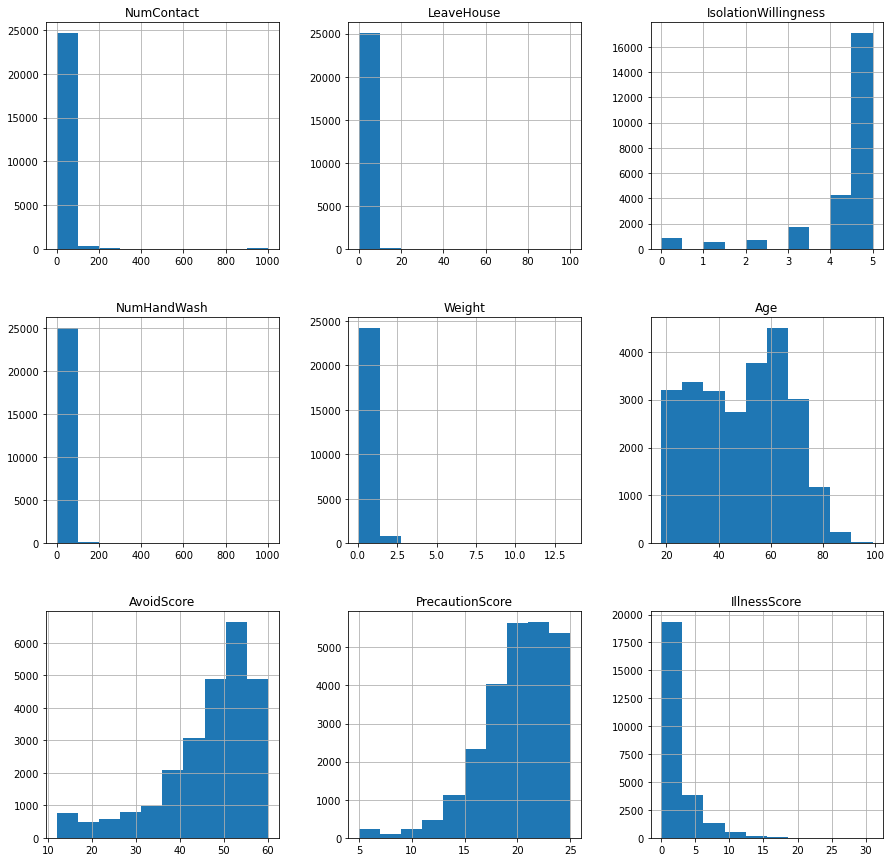

In [80]:
selected_df[['NumContact', 'LeaveHouse', 'IsolationWillingness', 'NumHandWash', 
             'Weight', 'Age', 'HouseholdSize', 'AvoidScore', 
             'PrecautionScore', 'IllnessScore']].hist(sharex=False, sharey=False, xlabelsize=10, ylabelsize=10, figsize=(15,15))

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

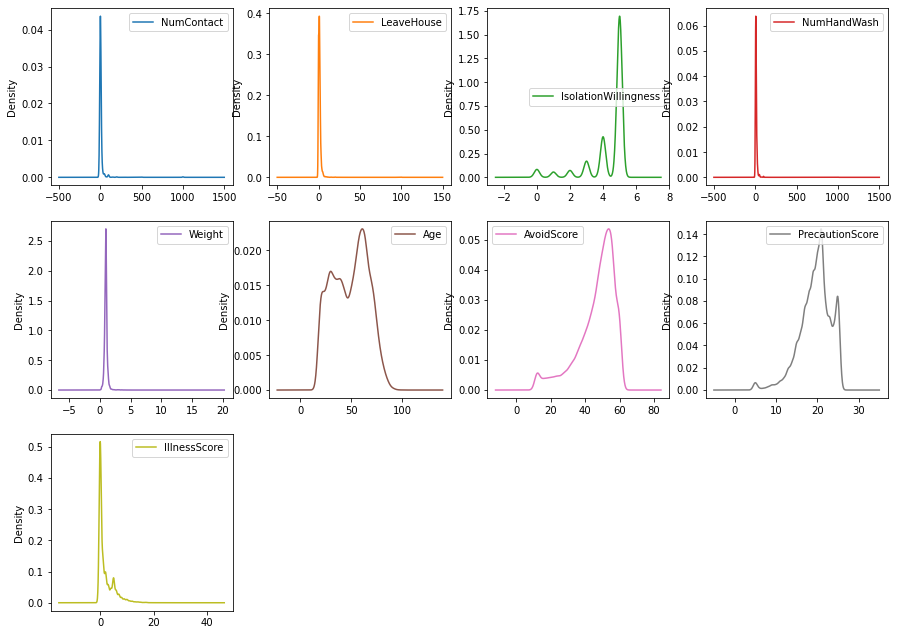

In [81]:
selected_df[['NumContact', 'LeaveHouse', 'IsolationWillingness', 'NumHandWash', 
             'Weight', 'Age', 'HouseholdSize', 'AvoidScore', 
             'PrecautionScore', 'IllnessScore']].plot(kind='density', subplots=True, layout=(4,4),
                                                      sharex=False, sharey=False, fontsize=10, figsize=(15,15))

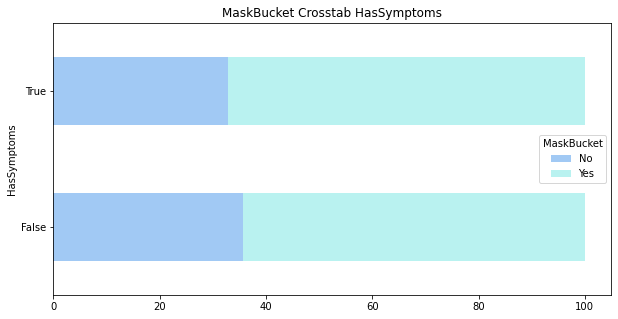

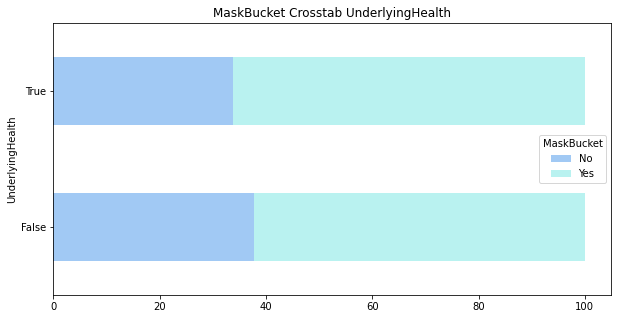

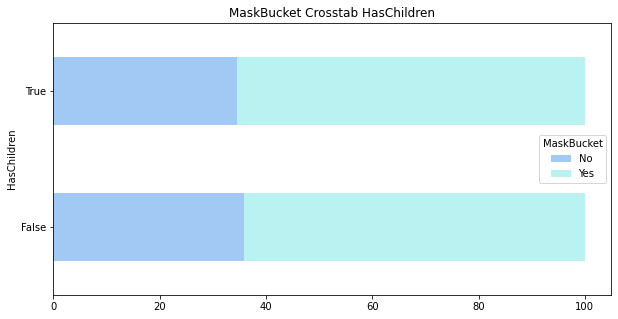

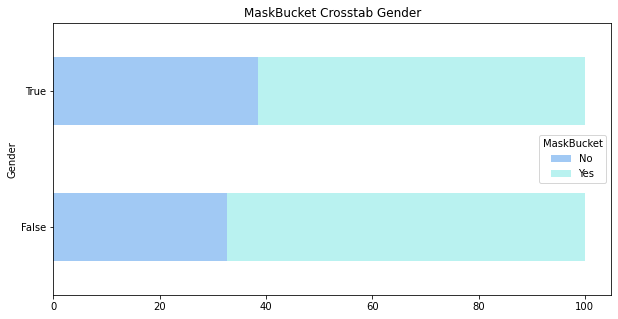

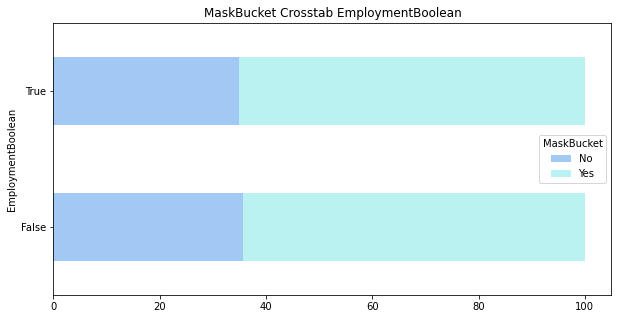

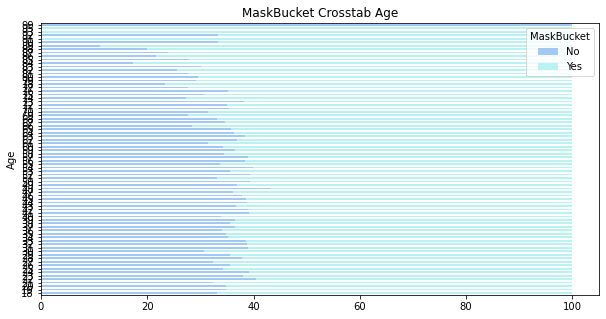

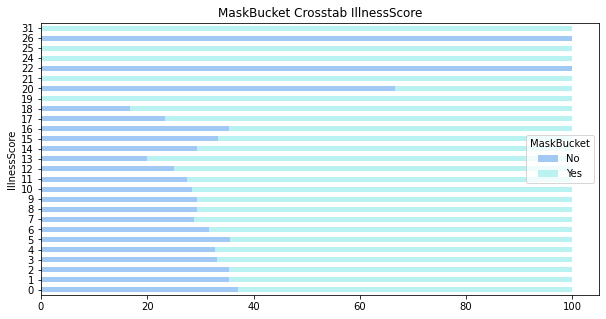

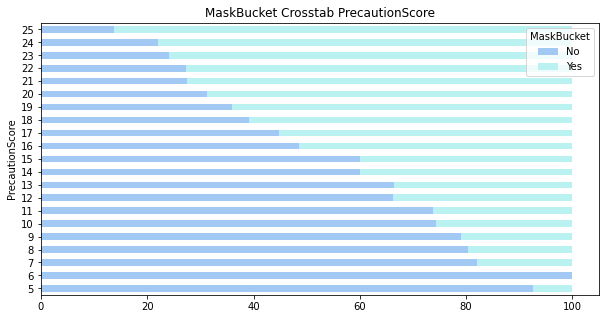

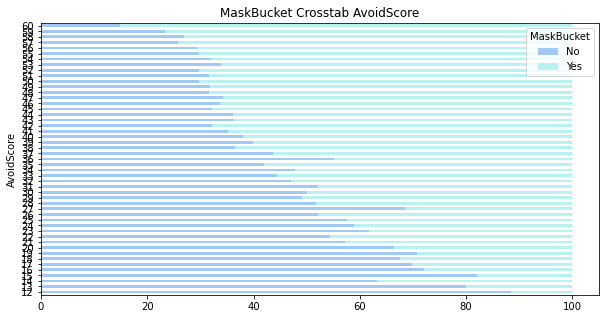

In [82]:
# Crosstab
plt.rcParams.update({'figure.max_open_warning': 0})
data = selected_df[['HasSymptoms', 'UnderlyingHealth', 'HasChildren', 'Gender', 'EmploymentBoolean', 'Age',
                    'IllnessScore', 'PrecautionScore', 'AvoidScore', 'MaskBucket']]
            
for column in data.columns:
    if column != 'MaskBucket':
        results = pd.crosstab(data['MaskBucket'], data[column])
        results = results.transpose()
        results_normalized = results.div(results.sum(axis = 1), axis = 0) * 100
        
        colours = sns.color_palette('pastel', n_colors=10)
        cmap1 = LinearSegmentedColormap.from_list("my_colormap", colours)
        
        ax = results_normalized.plot(kind = 'barh', stacked = True, figsize = (10,5), colormap = cmap1)
        ax.set_title('MaskBucket Crosstab ' + column)    

<AxesSubplot:>

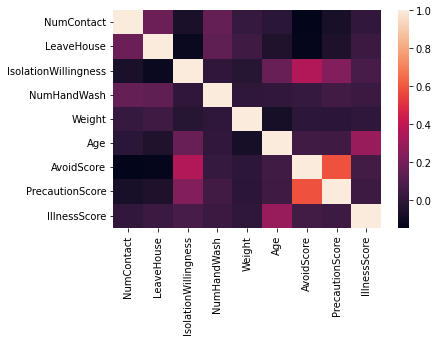

In [83]:
numeric_selected_df = selected_df[['NumContact', 'LeaveHouse', 'IsolationWillingness',
       'NumHandWash', 'Weight', 'Age', 'HouseholdSize', 'AvoidScore',
       'PrecautionScore', 'IllnessScore']]
sns.heatmap(numeric_selected_df.corr(method='pearson'))

In [84]:
selected_df = pd.read_csv("selected_dataset.csv", index_col=[0])
selected_df.head(5)

,HasSymptoms,UnderlyingHealth,HasChildren,Gender,EmploymentBoolean,NumContact,LeaveHouse,IsolationWillingness,NumHandWash,Weight,Age,HouseholdSize,AvoidScore,PrecautionScore,IllnessScore,MaskBucket
0,False,True,False,True,False,1,1,5,20,1.036370,73,1,58,23,1,No
1,True,False,False,False,False,6,0,4,20,1.016961,37,1,47,18,0,No
2,True,True,True,True,True,1,0,5,10,1.003516,25,8,52,19,5,Yes
3,False,True,False,True,False,1,1,5,8,1.002949,66,2,56,23,3,Yes
4,False,False,False,False,False,3,1,5,2,1.028216,25,2,53,12,0,No


In [85]:
# Replace boolean values with 1 and 0
selected_df.replace({False: 0, True: 1}, inplace=True)
selected_df.head(10)

,HasSymptoms,UnderlyingHealth,HasChildren,Gender,EmploymentBoolean,NumContact,LeaveHouse,IsolationWillingness,NumHandWash,Weight,Age,HouseholdSize,AvoidScore,PrecautionScore,IllnessScore,MaskBucket
0,0,1,0,1,0,1,1,5,20,1.036370,73,1,58,23,1,No
1,1,0,0,0,0,6,0,4,20,1.016961,37,1,47,18,0,No
2,1,1,1,1,1,1,0,5,10,1.003516,25,8,52,19,5,Yes
3,0,1,0,1,0,1,1,5,8,1.002949,66,2,56,23,3,Yes
4,0,0,0,0,0,3,1,5,2,1.028216,25,2,53,12,0,No
5,0,1,0,0,0,0,0,5,12,0.987659,68,4,54,21,7,No
6,0,0,1,0,1,0,0,4,5,0.977003,19,3,60,21,0,Yes
7,0,0,1,0,1,0,0,4,4,0.977003,19,3,58,22,0,Yes
8,0,0,0,1,1,4,2,3,25,1.001349,24,2,47,19,0,Yes
9,0,0,1,1,0,0,0,5,12,0.992129,21,4,54,22,0,Yes


# 4. Building KNN Model

In [86]:
# Set seed number and test_size
seed = 84
test_size = 0.3

In [87]:
selected_df["MaskBucket"].replace({"Yes": 1, "No": 0}, inplace=True)

## 4.1 Balance Dataset

In [88]:
selected_df["MaskBucket"].value_counts()

1    16297
0     8911
Name: MaskBucket, dtype: int64

In [89]:
# The size of minority dataset
minority_size = selected_df["MaskBucket"].value_counts()[0]

In [90]:
# Separate majority and minority classes
df_majority = selected_df[selected_df.MaskBucket==1]
df_minority = selected_df[selected_df.MaskBucket==0]

In [91]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=minority_size,     # to match minority class
                                 random_state=seed) # reproducible results
# Combine majority and minority datasets
selected_df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [92]:
selected_df_downsampled["MaskBucket"].value_counts()

1    8911
0    8911
Name: MaskBucket, dtype: int64

## 4.2 Split Dataset

In [93]:
# Make X and y datasets. The variables listed below are used for building the model.
X = selected_df_downsampled[['HasSymptoms', 'HasChildren', 'Gender', 
       'EmploymentBoolean', 'NumContact', 'LeaveHouse', 'IsolationWillingness',
       'NumHandWash', 'Weight', 'Age', 'HouseholdSize', 'AvoidScore',
       'PrecautionScore', 'IllnessScore']]
y = selected_df_downsampled['MaskBucket']

In [94]:
# Split dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = test_size, random_state= seed)

## 4.3 Scale Dataset

In [95]:
scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)

## 4.4 K Folds

In [96]:
# Build K Fold
num_folds = 10
kfold=KFold(n_splits = num_folds, shuffle = True, random_state = seed)
kfold.get_n_splits(X_train)
print(kfold)

KFold(n_splits=10, random_state=84, shuffle=True)


## 4.5 Building Model and Hyperparameter Tuning

In [97]:
# Build grid
# Here we use accuracy as the scoring metrics

scoring = 'accuracy'
k_values = np.arange(1,150)
param_grid = dict(n_neighbors = k_values, weights = ["distance", "uniform"])

In [98]:
# Build KNN Model
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv= kfold)
grid_result = grid.fit(rescaled_X_train, y_train)


In [99]:
print(f"Best: {grid_result.best_score_} {grid_result.best_params_}" )

Best: 0.6412006764953838 {'n_neighbors': 146, 'weights': 'distance'}


In [100]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

In [101]:
dist_mean = list()
dist_stds = list()
uni_mean = list()
uni_stds = list()
dist_n_n_index = list()
uni_n_n_index = list()

for i in range(len(means)):
    
    if params[i]['weights'] == "distance":
        dist_mean.append(means[i])
        dist_stds.append(stds[i])
        dist_n_n_index.append(params[i]['n_neighbors'])
        
    elif params[i]['weights'] == "uniform":
        uni_mean.append(means[i])
        uni_stds.append(stds[i])
        uni_n_n_index.append(params[i]['n_neighbors'])


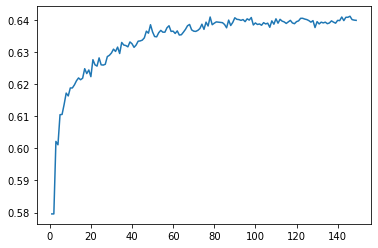

In [102]:
# Plot score mean vs k neighbours, using distance
plt.plot(dist_n_n_index, dist_mean)

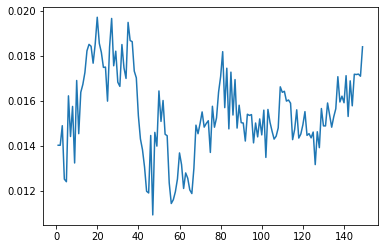

In [103]:
# Plot score stds vs k neighbours, using distance
plt.plot(dist_n_n_index, dist_stds)

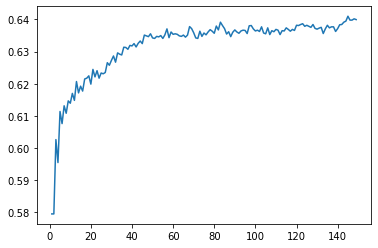

In [104]:
# Plot score mean vs k neighbours, using uniform
plt.plot(uni_n_n_index, uni_mean)

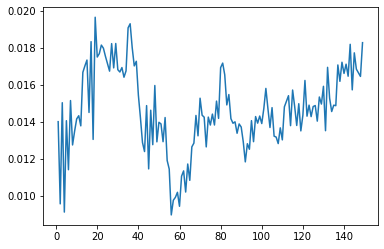

In [105]:
# Plot score stds vs k neighbours, using uniform
plt.plot(uni_n_n_index, uni_stds)

In [106]:
best_n_neighbour = grid_result.best_params_['n_neighbors']

## 4.6 Prediction

In [107]:
# Use the best n neighbour value to test the model
trained_model = KNeighborsClassifier(n_neighbors = best_n_neighbour, weights="distance")
trained_model.fit(rescaled_X_train,y_train)
rescaled_X_test = scaler.transform(X_test)
y_pred = trained_model.predict(rescaled_X_test)

In [108]:
# Confusion Matrix
# TT  FN
# FT  TN
confusion_matrix(y_test, y_pred)

array([[1587, 1074],
       [ 904, 1782]], dtype=int64)

In [109]:
# Final accuracy score
balanced_accuracy_score(y_test, y_pred)

0.6299161966386315

In [111]:
accuracy_score(y_test, y_pred)

0.6300729380961286